## Name: Shwetabahen Rangani


Date : March 10/2023






In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib_venn as venn



population = pd.read_csv('population.csv')
olympic = pd.read_csv('olympic_athletes.csv')
game = pd.read_csv('game_consoles.csv')


# Quesion 1

#### Use Seaborn to recreate the plot from Question 3 of Assignment 2. This plot shows the yearly population change (raw value) per continent over the past 60 years.

/var/folders/15/r60z_2ns0ll4xmbm4715mq480000gn/T/ipykernel_2752/3282074721.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rec1 = data1.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
/var/folders/15/r60z_2ns0ll4xmbm4715mq480000gn/T/ipykernel_2752/3282074721.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rec1 = data1.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
/var/folders/15/r60z_2ns0ll4xmbm4715mq480000gn/T/ipykernel_2752/3282074721.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rec2 = data2.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_ind

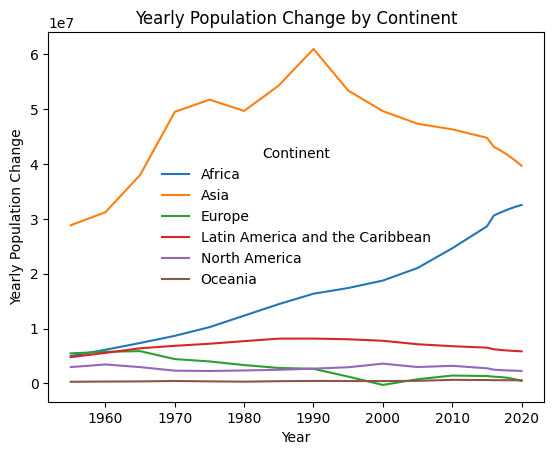

In [2]:

data1 = population[(population['Continent'] == 'Africa') & ( population['Year'] >= 1950)]
rec1 = data1.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
sns.lineplot(x = rec1['Year'], y = rec1['YearlyChange'],label='Africa')


data2 = population[(population['Continent'] == 'Asia') & ( population['Year'] >= 1950)]
rec2 = data2.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
sns.lineplot(x = rec2['Year'], y = rec2['YearlyChange'],label='Asia')

data3 = population[(population['Continent'] == 'Europe') & ( population['Year'] >= 1950)]
rec3 = data3.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
sns.lineplot(x = rec3['Year'], y = rec3['YearlyChange'],label='Europe')

data4 = population[(population['Continent'] == 'Latin America and the Caribbean') & ( population['Year'] >= 1950)]
rec4 = data4.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
sns.lineplot(x = rec4['Year'], y = rec4['YearlyChange'],label='Latin America and the Caribbean')

data5 = population[(population['Continent'] == 'North America') & ( population['Year'] >= 1950)]
rec5 = data5.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
sns.lineplot(x = rec5['Year'], y = rec5['YearlyChange'],label='North America')

data6 = population[(population['Continent'] == 'Oceania') & ( population['Year'] >= 1950)]
rec6 = data6.groupby(['Year'])['Continent', 'Country','YearlyChange'].sum().reset_index()
sn=sns.lineplot(x = rec6['Year'], y = rec6['YearlyChange'],label='Oceania')

plt.legend(title ='Continent', loc='center',frameon=False)
sn.set(xlabel ="Year", ylabel = "Yearly Population Change", title ='Yearly Population Change by Continent')

plt.show()


### Question-2

#### Use Seaborn to recreate the plot from Question 2 of Assignment 3. This plot shows the average height of male and female Olympians over the history of the Summer Olympics.

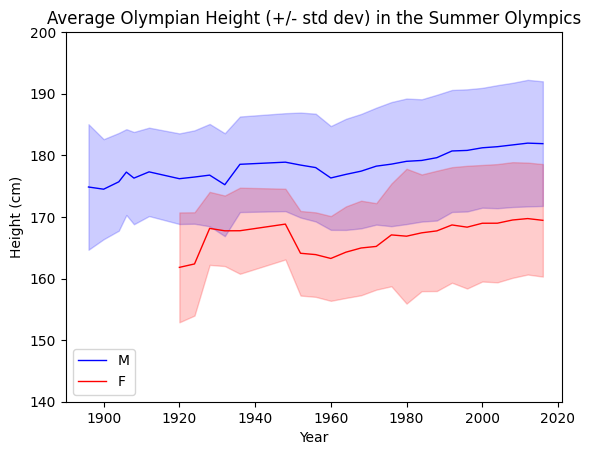

In [3]:
df=olympic
df2=df.drop_duplicates(['ID']).dropna(subset=['Height'])
FemaleRec = df[(df['Season'] == 'Summer') & (df['Sex'] == 'F') ]
MaleRec = df2[(df2['Season'] == 'Summer') & (df2['Sex'] == 'M') ]

sns.lineplot(x = "Year", y = "Height", data = MaleRec, errorbar='sd',color = "blue",label="M",lw=1)
gfg = sns.lineplot(x = "Year", y = "Height", data = FemaleRec, errorbar='sd',color="red",label="F",lw=1)

gfg.set(xlabel ="Year", ylabel = "Height (cm)", title ='Average Olympian Height (+/- std dev) in the Summer Olympics')
gfg.set_ylim((140, 200))
gfg.set_xlim((1890,2021))
gfg.legend(loc='lower left')

plt.show()




## Question-3

#### The figure below is a sunburst plot showing the total number of video game consoles sold by Nintendo, Microsoft and Sony. The inner ring shows the total number of consoles sold per company, and the outer ring refines each company into their individual consoles

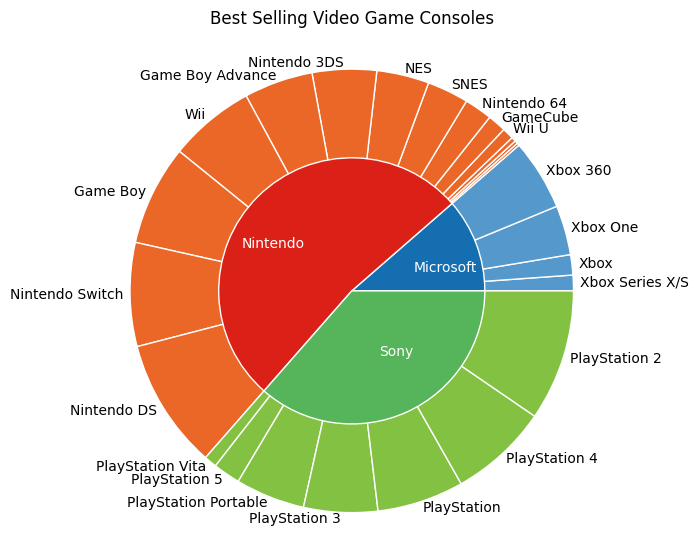

In [4]:
df_game=game.sort_values(['Company','Units_sold']).groupby('Company').head(100)
df_game['color']= np.array(0)
df_game.loc[df_game["Company"] == 'Microsoft', "color"] = '#5599CC'
df_game.loc[df_game["Company"] == 'Sony', "color"] = '#83C143'
df_game.loc[df_game["Company"] == 'Nintendo', "color"] = '#EA6727'

sonysum=df_game[df_game['Company']=='Sony']['Units_sold'].sum()
nintendosum=df_game[df_game['Company']=='Nintendo']['Units_sold'].sum()
microsoftsum=df_game[df_game['Company']=='Microsoft']['Units_sold'].sum()

df_game.loc[df_game["Units_sold"] < 10000000, "Console"] = ''

fig, ax = plt.subplots()
size = 0.5

ax.pie(df_game['Units_sold'],labels=df_game['Console'], radius=1.5,
       colors=df_game['color'],
       wedgeprops=dict(width=0.9, edgecolor='w'), counterclock=True, pctdistance=0.5, labeldistance=1.03)

ax.pie([microsoftsum,nintendosum,sonysum],labels=['Microsoft','Nintendo','Sony'], colors=['#156EAF', '#DB2018', '#56B45B']
       ,radius=0.9,wedgeprops=dict(width=0.9, edgecolor='w'),counterclock=True,pctdistance=0.5, labeldistance=0.5, textprops={'color':"w"})

plt.title('Best Selling Video Game Consoles', y=1.20)
plt.show()



## Question-4

#### The bar plot below shows the number of athletes that competed in the 2012 (dark blue) and 2016 (light blue) Olympics from a set of different countries. The Venn diagram acts as the legend – it informs the meaning of each colour. Additionally, it shows the overlap on the number of athletes (from these countries) that competed in both Olympics, and how many competed in just one of these Olympics.

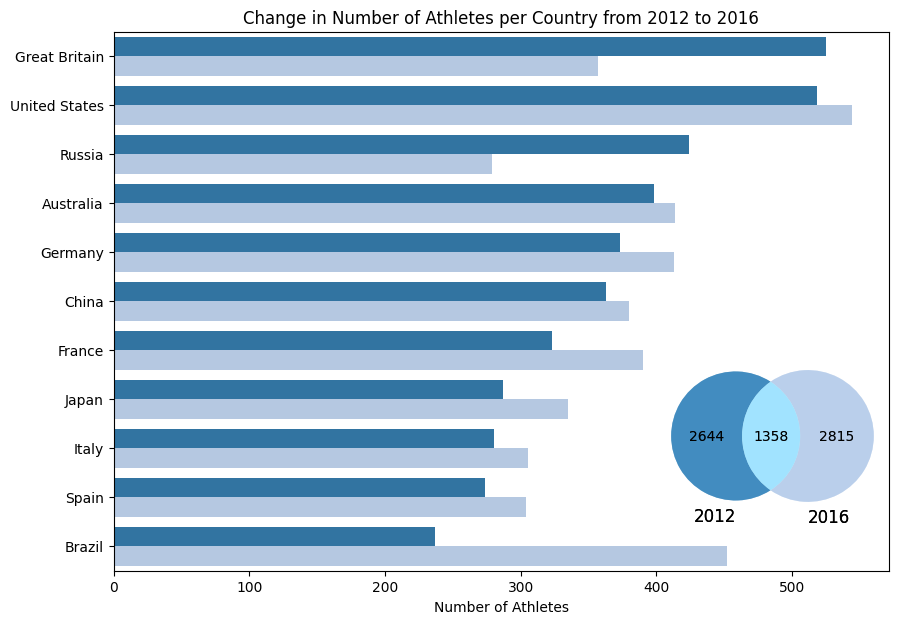

In [5]:
df=olympic
df = df[(df['Year'] == 2012) | (df['Year'] == 2016)]

df=df.drop_duplicates(['ID','Year']).dropna(subset=['ID','Year'])

df1 = df.groupby(['Team'])['ID'].count().reset_index().sort_values(by='ID',ascending=False).nlargest(11,'ID')

filter1 = df["Team"].isin(df1['Team'])

df2=df[filter1]

df3 = df2.groupby(['Year','Team']).size().to_frame('size').reset_index()
df31 = df2.groupby(['Year','Team','ID']).size().to_frame('size').reset_index()

df3=df3.sort_values(['Year', 'size'],ascending = [True, False])
athletes2012 = set(df31[df31.Year == 2012].ID)
athletes2016 = set(df31[df31.Year == 2016].ID)


fig4, ax4 = plt.subplots(figsize = (10,7))

g2=sns.barplot(x = 'size',y = 'Team',hue = 'Year',data = df3.head(25),palette=("tab20"))
g2.set(ylabel=None)
g2.set(xlabel='Number of Athletes')
g2.legend([],[], frameon=False)

g2.set_title('Change in Number of Athletes per Country from 2012 to 2016')
ax5 = ax4.inset_axes([0.7, 0.1, 0.3, 0.3])

v = venn.venn2(subsets = (athletes2012, athletes2016), set_labels = ('2012', '2016'), set_colors=['#1f77b4', '#aec7e8', '#b5c8e1'], ax=ax5, alpha=0.6)
fig4.add_axes(ax5)
plt.show()
